This notebook was created for testing MEDCLIP

In [1]:
!pip install --user torch==2.2.2 torchvision==0.17.2 torchaudio==2.2.2 --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121
  Using cached https://download.pytorch.org/whl/cu121/torch-2.2.2%2Bcu121-cp311-cp311-win_amd64.whl (2454.8 MB)
  Using cached https://download.pytorch.org/whl/cu121/torchvision-0.17.2%2Bcu121-cp311-cp311-win_amd64.whl (5.7 MB)
  Using cached https://download.pytorch.org/whl/cu121/torchaudio-2.2.2%2Bcu121-cp311-cp311-win_amd64.whl (4.1 MB)


In [2]:
import pandas as pd
from IPython.display import Image, display
import os
from PIL import Image
import matplotlib.pyplot as plt

Loading the Dataset

In [3]:
data_directory = "../Datasets/ROCO2/"
df_train = pd.read_csv(data_directory + 'train_captions.csv')
df_train.head()
df_train['Image'] = df_train['ID'] + '.jpg'
df_train = df_train.drop(columns=['ID'])
df_train.head()

,Caption,Image
0,Head CT demonstrating left parotiditis.,ROCOv2_2023_train_000001.jpg
1,Acquired renal cysts in end-stage renal failur...,ROCOv2_2023_train_000002.jpg
2,Computed tomography of the chest showing the r...,ROCOv2_2023_train_000003.jpg
3,Lateral view of the sacrum showing the low con...,ROCOv2_2023_train_000004.jpg
4,Thoracic CT scan showing perihilar pulmonary l...,ROCOv2_2023_train_000005.jpg


Exploratory Data Analysis

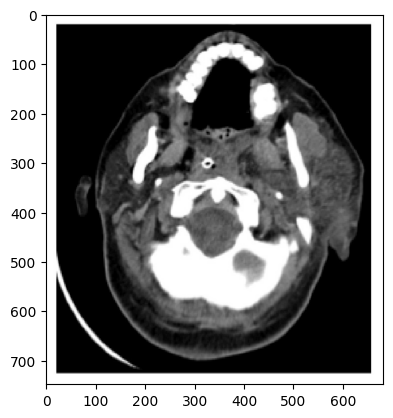

In [4]:
train_image_dir = data_directory +"train_images/train/"
img = Image.open(train_image_dir + df_train.iloc[0]['Image'])
plt.imshow(img, aspect='equal')

In [5]:
max_caption_length = df_train["Caption"].str.len().max()
print(max_caption_length)

2854


In [6]:
# Shape of the DataFrame
print("Shape of the DataFrame:", df_train.shape)

# Summary of the DataFrame
print("\nDataFrame Info:")
print(df_train.info())

# First few rows of the DataFrame
print("\nFirst 5 Rows:")
print(df_train.head())

# Last few rows of the DataFrame
print("\nLast 5 Rows:")
print(df_train.tail())

Shape of the DataFrame: (60163, 2)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60163 entries, 0 to 60162
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Caption  60163 non-null  object
 1   Image    60163 non-null  object
dtypes: object(2)
memory usage: 940.2+ KB
None

First 5 Rows:
                                             Caption  \
0            Head CT demonstrating left parotiditis.   
1  Acquired renal cysts in end-stage renal failur...   
2  Computed tomography of the chest showing the r...   
3  Lateral view of the sacrum showing the low con...   
4  Thoracic CT scan showing perihilar pulmonary l...   

                          Image  
0  ROCOv2_2023_train_000001.jpg  
1  ROCOv2_2023_train_000002.jpg  
2  ROCOv2_2023_train_000003.jpg  
3  ROCOv2_2023_train_000004.jpg  
4  ROCOv2_2023_train_000005.jpg  

Last 5 Rows:
                                                 Caption  \
60158     CT se

In [7]:
# Check for missing values
print("\nMissing Values Count:")
print(df_train.isnull().sum())

# Check for duplicate rows
print("\nNumber of Duplicate Rows:", df_train.duplicated().sum())


Missing Values Count:
Caption    0
Image      0
dtype: int64

Number of Duplicate Rows: 0


In [8]:
# Removing rows with captions smaller than 10 characters
df_train = df_train[df_train['Caption'].str.len() >= 10]

In [9]:
# Summary statistics for all columns
print("\nSummary Statistics for All Columns:")
print(df_train.describe(include='all'))


Summary Statistics for All Columns:
                              Caption                         Image
count                           60122                         60122
unique                          59813                         60122
top     Initial panoramic radiograph.  ROCOv2_2023_train_000001.jpg
freq                               37                             1


In [10]:
!python -c "import torch; print(torch.__version__)"

2.2.2+cu121


In [16]:
from medclip import MedCLIPModel, MedCLIPVisionModelViT
from medclip import MedCLIPProcessor
from transformers import CLIPProcessor, CLIPModel

In [18]:
# prepare for the demo image and texts
processor = MedCLIPProcessor()
image = Image.open(train_image_dir + df_train.iloc[0]['Image'])
inputs = processor(
    text=[df_train.iloc[0]['Caption']], 
    images=image, 
    return_tensors="pt", 
    padding=True
    )

# pass to MedCLIP model
model = MedCLIPModel(vision_cls=MedCLIPVisionModelViT)
model.from_pretrained()
model.cuda()
outputs = model(**inputs)
print(outputs.keys())
# dict_keys(['img_embeds', 'text_embeds', 'logits', 'loss_value', 'logits_per_text'])

C:\Users\ninja\AppData\Roaming\Python\Python311\site-packages\transformers\models\clip\feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
C:\Users\ninja\AppData\Roaming\Python\Python311\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


AttributeError: 'MedCLIPFeatureExtractor' object has no attribute 'convert_rgb'